In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png' 
import pylab as plb
import numpy as np
import scipy as sp
import flylib as flb
import group_data as gd
import plotfuncs as plf
import sys
sys.path.append('/media/analysis-code/figurefirst/')
import figurefirst as fifi
plb.rcParams['font.size'] =  9
plb.rcParams['pdf.fonttype'] = 42
plb.rcParams['image.interpolation'] = 'nearest'
plb.rcParams['image.aspect'] = 'auto'
plb.rcParams['image.cmap'] = 'BrBG'
import h5py
demo_mode = False

# load data

In [2]:
filter_mode = 'non_linear'
saccade_tables_39E01 = h5py.File('detected_saccades_nl_39E01.hdf5','r')
saccade_tables_22H05 = h5py.File('detected_saccades_nl_22H05.hdf5','r')

In [3]:
lw_natural_22H05 = gd.signal_plot_info['Ph0']['transform'](
                    (np.array(saccade_tables_22H05['Ph0'])* 
                      np.array(saccade_tables_22H05['lwing_norm'])[:,None]) + \
                        np.array(saccade_tables_22H05['lwing_mean'])[:,None])
    
rw_natural_22H05 = gd.signal_plot_info['Ph1']['transform'](
                    (np.array(saccade_tables_22H05['Ph1'])* 
                      np.array(saccade_tables_22H05['rwing_norm'])[:,None]) + \
                        np.array(saccade_tables_22H05['rwing_mean'])[:,None])
    
lmr_natural_22H05 = gd.signal_plot_info['Ph2']['transform'](
                    (np.array(saccade_tables_22H05['Ph2'])* 
                      np.array(saccade_tables_22H05['lmr_norms'])[:,None]) + \
                        np.array(saccade_tables_22H05['lmr_mean'])[:,None])
    

lw_natural_39E01 = gd.signal_plot_info['Ph0']['transform'](
                    (np.array(saccade_tables_39E01['Ph0'])* 
                      np.array(saccade_tables_39E01['lwing_norm'])[:,None]) + \
                        np.array(saccade_tables_39E01['lwing_mean'])[:,None])
    
rw_natural_39E01 = gd.signal_plot_info['Ph1']['transform'](
                    (np.array(saccade_tables_39E01['Ph1'])* 
                      np.array(saccade_tables_39E01['rwing_norm'])[:,None]) + \
                        np.array(saccade_tables_39E01['rwing_mean'])[:,None])
    
lmr_natural_39E01 = gd.signal_plot_info['Ph2']['transform'](
                    (np.array(saccade_tables_39E01['Ph2'])* 
                      np.array(saccade_tables_39E01['lmr_norms'])[:,None]) + \
                        np.array(saccade_tables_39E01['lmr_mean'])[:,None])

In [4]:
# load the trial data for the example trace
mtd_22H05 = h5py.File('../04_process_open_loop_cohort1/open_loop_trial_db_22H05.hdf5','r')
def get_selection_mtrx(trial):
    selection = trial_names == trial
    norms = np.array(mtd_22H05['signal_norms']['Ph2'][selection])
    return np.array(mtd_22H05['normed_signals']['Ph2'][selection,:])*norms[:,None]

# load the example trial shown in the open_loop_motion analysis figure
#example_trial = 2
example_trial = 4
sub_samples = 20

trial_names = np.array(mtd_22H05['selected_signals']['trial_names'])
data_selection = get_selection_mtrx('yaw_left')
down_samp_idx = np.linspace(2,data_selection.shape[0]-2,sub_samples).astype(int)
example_signal = data_selection[down_samp_idx,:][example_trial,:]

import flylib as flb
import scipy
xi = gd.get_xio('yaw_left')
############################
############################
## from the roc analysis 
ks = 81, 
ms = 34,
ms = 9
thresh = 0.15384615384615385
############################
############################
from scipy import signal

trend = signal.medfilt(example_signal,kernel_size = ks)
detrend = example_signal-trend
detrend_smooth = signal.wiener(detrend,mysize = ms)
noise = detrend - detrend_smooth

In [22]:
#load the chosen filter settings
import cPickle
with open('chosen_filter_settings.cpkl','rb') as f:
    chosen_settings = cPickle.load(f)

#chosen_settings

# sort saccades

In [6]:
#sort_sig = saccade_tables['filtered'][:,20]
#sort_sig_22H05 = np.mean(rw_natural_22H05[:,49:51],axis = 1) - np.mean(rw_natural_22H05[:,:30],axis = 1)
#sort_sig_39E01 = np.mean(rw_natural_39E01[:,49:51],axis = 1) - np.mean(rw_natural_39E01[:,:30],axis = 1)

sort_sig_22H05 = np.mean(saccade_tables_22H05['lmr_natural'][:,49:51],axis = 1) \
                        - np.mean(saccade_tables_22H05['lmr_natural'][:,:30],axis = 1)


sort_sig_39E01 = np.mean(saccade_tables_39E01['lmr_natural'][:,49:51],axis = 1) \
                        - np.mean(saccade_tables_39E01['lmr_natural'][:,:30],axis = 1)

sort_idx_22H05 = np.argsort(sort_sig_22H05,axis = 0)
sort_idx_39E01 = np.argsort(sort_sig_39E01,axis = 0)

In [7]:
#create dict of sorted trials in memory
sorted_saccades_22H05 = dict()
[sorted_saccades_22H05.update({sig:np.array(saccade_tables_22H05[sig])[sort_idx_22H05]}) for 
                                                sig in saccade_tables_22H05.keys()];
sorted_saccades_39E01 = dict()
[sorted_saccades_39E01.update({sig:np.array(saccade_tables_39E01[sig])[sort_idx_39E01]}) for 
                                                sig in saccade_tables_39E01.keys()];

In [8]:
#sorted_saccades_22H05.update({'lw_natural':lw_natural_22H05[sort_idx_22H05]})
#sorted_saccades_22H05.update({'rw_natural':rw_natural_22H05[sort_idx_22H05]})
#sorted_saccades_22H05.update({'lmr_natural':lmr_natural_22H05[sort_idx_22H05]})

#sorted_saccades_39E01.update({'lw_natural':lw_natural_39E01[sort_idx_39E01]})
#sorted_saccades_39E01.update({'rw_natural':rw_natural_39E01[sort_idx_39E01]})
#sorted_saccades_39E01.update({'lmr_natural':lmr_natural_39E01[sort_idx_39E01]})

In [9]:
select_idx_22H05 = (np.min(sorted_saccades_22H05['xi'],axis = 1))<0
select_idx_39E01 = (np.min(sorted_saccades_39E01['xi'],axis = 1))<0

In [10]:
#create dict of sorted trials in memory
selected_saccades_22H05 = dict()
[selected_saccades_22H05.update({sig:np.array(sorted_saccades_22H05[sig])[select_idx_22H05]}) for 
                                                sig in sorted_saccades_22H05.keys()];
selected_saccades_39E01 = dict()
[selected_saccades_39E01.update({sig:np.array(sorted_saccades_39E01[sig])[select_idx_39E01]}) for 
                                                sig in sorted_saccades_39E01.keys()];

In [11]:
#plb.imshow(np.array(saccade_tables['filtered'])[sort_idx,:],aspect='auto',vmin = -4,vmax = 4)

# make plot

In [120]:
def resamp_decile(data_chunk,fly_nums):
    flies = set(fly_nums)
    fly_means = list()
    for fly in flies:
        fly_mask = np.argwhere(fly_nums == fly)
        fly_means.append(np.mean(data_chunk[fly_mask,:],axis = 0))
    fly_means = np.squeeze(fly_means)
    resamps = list()
    for resamp in range(100):
        N = len(fly_means)
        idx = np.random.choice(N,N)
        resamps.append(np.mean(fly_means[idx,:],axis = 0))
    resamps = np.squeeze(resamps)
    ub = np.percentile(resamps,97.5,axis = 0)
    lb = np.percentile(resamps,2.25,axis = 0)
    m = np.mean(fly_means,axis = 0)
    return {'ub':ub,'lb':lb,'m':m}

In [145]:
xi = gd.get_xio('yaw_left')
layout = fifi.FigureLayout('figure4_layout.svg')
layout.load_pathspecs()
lkwa = layout.pathspecs['tracespec'].mplkwargs()

quantile_ranges_22H05 = np.linspace(0,np.shape(selected_saccades_22H05['Ph2'])[0],11).astype(int)[::-1]
quantile_ranges_39E01 = np.linspace(0,np.shape(selected_saccades_39E01['Ph2'])[0],11).astype(int)[::-1]

sorted_saccades = selected_saccades_22H05
#quantile_ranges = quantile_ranges_22H05

layout.make_mplfigures()
decile_list = [u'0-10',u'10-20',u'20-30',u'30-40',
               u'40-50',u'50-60',u'60-70',u'70-80',u'80-90',u'90-100']
decile_list.reverse()

#########
#### Fig 4A
#########
mkwa = layout.pathspecs['trendspec'].mplkwargs()
thrkwa = layout.pathspecs['thresh_patch'].mplkwargs()
epkwa = layout.pathspecs['epoch_patch'].mplkwargs()
layout.axes['example_raw'].plot(xi,example_signal,clip_on = False,**lkwa)
layout.axes['example_raw'].plot(xi,trend,clip_on = False,**mkwa)

layout.axes['example_sac_band'].plot(xi,detrend_smooth,clip_on = False,**lkwa)
layout.axes['example_sac_band'].set_ybound(-2,2)

layout.axes['example_high_band'].plot(xi,noise,clip_on = False,**lkwa)
layout.axes['example_high_band'].set_ybound(-2,2)

layout.axes['detection_thresh'].axhspan(thresh*-1,thresh,**thrkwa)
layout.axes['detection_thresh'].set_ybound(-2,2)

layout.axes['detection_thresh'].set_zorder(-100)
layout.axes['stim_epoch'].axvspan(0,3,**epkwa)

#########
#### Fig 4B
#########

for key,axgroup in layout.axes_groups['none'].items():
    try:
        decile_idx = decile_list.index(key)
        range_start_22H05 = quantile_ranges_22H05[decile_idx+1]
        range_stop_22H05 = quantile_ranges_22H05[decile_idx]
        
        range_start_39E01 = quantile_ranges_39E01[decile_idx+1]
        range_stop_39E01 = quantile_ranges_39E01[decile_idx]
        
        for axname,ax in axgroup.items():
            
            if axname in ['b2','hg1','hg2','hg3','hg4']:
                data_chunk = np.array(selected_saccades_39E01[axname][range_start_39E01:range_stop_39E01,:])
                fly_nums = np.array(selected_saccades_39E01['fly_numbers'][range_start_39E01:range_stop_39E01])
            else:
                data_chunk = np.array(selected_saccades_22H05[axname][range_start_22H05:range_stop_22H05,:])
                fly_nums = np.array(selected_saccades_39E01['fly_numbers'][range_start_22H05:range_stop_22H05])
            try:
                data_chunk = gd.signal_plot_info[axname]['transform'](data_chunk)
            except KeyError:
                data_chunk = gd.signal_plot_info['Ph2']['transform'](data_chunk)
            data_chunk -= np.nanmean(data_chunk[:,:30],axis = 1)[:,np.newaxis]
            
            x = np.linspace(-50*.021,50*.021,np.shape(data_chunk)[1])[25:]
            kwargs = layout.pathspecs['error_patch_tser'].mplkwargs()
            sts = resamp_decile(data_chunk,fly_nums)
            ax.fill_between(x,sts['ub'][25:],sts['lb'][25:],**kwargs)
            ax.plot(x,sts['m'][25:],clip_on = False,**lkwa)
            
            
            #y = np.nanmean(data_chunk,axis = 0)[25:]
            #ax.plot(x, y,clip_on = False,**lkwa)
            ax.set_xbound(-.5,1.0)
    except ValueError:
        pass

vlkwa = layout.pathspecs['axvline'].mplkwargs()
for axname,ax in layout.axes.items():
    if 'sta_xrng' in axname:
        ax.axvline(0,**vlkwa)
        ax.set_xbound(-0.5,1.0)

#########
#### Fig 4C
#########


for sig,ax in layout.axes_groups['none']['failures'].items():
    if sig in ['b2']:
        range_start = quantile_ranges_39E01[10]
        range_stop = quantile_ranges_39E01[9]
        data_chunk = np.array(selected_saccades_39E01[sig][range_start:range_stop,:])
        data_chunk -= np.mean(data_chunk[:,:30],axis = 1)[:,np.newaxis]
        x = np.linspace(-50*.021,50*.021,np.shape(data_chunk)[1])[25:]
        for y in data_chunk[::8]:
            ax.plot(x,y[25:],clip_on = False,c = 'k',alpha = 0.1)
        ax.plot(x,np.mean(data_chunk,axis = 0)[25:])
        ax.set_xbound(-.5,1.0)
    else:
        range_start = quantile_ranges_22H05[2]
        range_stop = quantile_ranges_22H05[1]
        data_chunk = np.array(selected_saccades_22H05[sig][range_start:range_stop,:])
        data_chunk -= np.mean(data_chunk[:,:30],axis = 1)[:,np.newaxis]
        x = np.linspace(-50*.021,50*.021,np.shape(data_chunk)[1])[25:]
        for y in data_chunk[::8]:
            ax.plot(x,y[25:],clip_on = False,c = 'k',alpha = 0.1)
        ax.plot(x,np.mean(data_chunk,axis = 0)[25:])
        ax.set_xbound(-.5,1.0)
    

#########
#### Fig 4D
#########

def get_kde(data_chunk,xrng = [-4,4],bandwidth = 0.2):
    from sklearn.neighbors import KernelDensity
    X = np.mean(data_chunk[:,49:51],axis = 1)[:, np.newaxis] 
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X)
    X_plot = np.linspace(xrng[0], xrng[1], 50)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    return X_plot,np.exp(log_dens)

def get_amps(data_chunk):
    X = np.mean(data_chunk[:,45:55],axis = 1)[:, np.newaxis] 
    return X

amp_dict = dict()
[amp_dict.update({sig:{}}) for sig in layout.axes_groups['none']['kde'].keys()]

from copy import copy
kkwa = copy(lkwa)
for sig,ax in layout.axes_groups['none']['kde'].items():
    for decile_idx,decile in enumerate(decile_list):
        if sig in ['b2','hg1','hg2','hg3','hg4']:
            range_start = quantile_ranges_39E01[decile_idx+1]
            range_stop = quantile_ranges_39E01[decile_idx]
            kkwa['color'] = plb.cm.BrBG((decile_idx)/float(len(decile_list)))
            data_chunk = np.array(selected_saccades_39E01[sig][range_start:range_stop,:])
            data_chunk -= np.mean(data_chunk[:,:45],axis = 1)[:,np.newaxis]
            ax.plot(*get_kde(data_chunk),clip_on = False,**kkwa)
            d_list = get_amps(data_chunk)
            if sig in ['hg1']:
                if decile_idx == 0:
                    layout.axes['hg1_inset'].plot(*get_kde(data_chunk,xrng = [-1,8]),clip_on = False,**kkwa)
            if sig in ['b2']:
                if decile_idx == 9:
                    layout.axes['b2_inset'].plot(*get_kde(data_chunk,xrng = [-1,8]),clip_on = False,**kkwa)
        else:
            range_start = quantile_ranges_22H05[decile_idx+1]
            range_stop = quantile_ranges_22H05[decile_idx]
            kkwa['color'] = plb.cm.BrBG((decile_idx)/float(len(decile_list)))
            data_chunk = np.array(selected_saccades_22H05[sig][range_start:range_stop,:])
            data_chunk -= np.mean(data_chunk[:,:45],axis = 1)[:,np.newaxis]
            ax.plot(*get_kde(data_chunk),clip_on = False,**kkwa)
            d_list = get_amps(data_chunk)
            if sig in ['i1']:
                if decile_idx == 0:
                    layout.axes['i1_inset'].plot(*get_kde(data_chunk,xrng = [-1,8]),clip_on = False,**kkwa)
            if sig in ['iii1']:
                if decile_idx == 9:
                    layout.axes['iii1_inset'].plot(*get_kde(data_chunk,xrng = [-1,8]),clip_on = False,**kkwa)
                    
        #print sig
        amp_dict[sig][decile_idx] = d_list

def get_stats(dta):
    from numpy import random
    n = np.shape(dta)[1]
    resamps = list()
    for rep in range(1000):
        idxs = random.choice(range(n),n,replace = True)
        resamps.append(np.mean(dta[:,idxs],axis = 1))
    ub = np.percentile(resamps,97.5,axis = 0)
    lb = np.percentile(resamps,2.5,axis = 0)
    mn = np.mean(dta,axis = 1)
    return mn,ub,lb

### amp vs decile 
for key,ax in layout.axes_groups['none']['amp_vs_decile'].items():
    
    trace_kwargs = layout.pathspecs['tracespec'].mplkwargs()
    error_kwargs = layout.pathspecs['er'].mplkwargs()
    
    dta = [amp_dict[key][i] for i in range(10)]
    trim = np.min([np.shape(x)[0] for x in dta])
    dta = np.squeeze([x[:trim,:] for x in dta])

    mn,ub,lb = get_stats(dta)
    if 'natural' in key:
        mn = gd.signal_plot_info['Ph1']['transform'](mn)
        ax.plot(range(10),mn,'-o',color = 'k',ms = '2',clip_on = False)
        ax.set_ybound(-20,20)
    else:
        ax.plot(range(10),mn,'-o',color = 'k',ms = '2',clip_on = False)
        ax.set_ybound(-1,1)

for key,ax in layout.axes.items():
    try:
        plb.sca(ax['axis'])
        plf.kill_spines()
    except ValueError:
        print key
        
layout.apply_mpl_methods()
layout.insert_figures()
layout.set_layer_visibility('Layer 6',True)
layout.set_layer_visibility('Layer 2',True)
layout.set_layer_visibility('Layer 3',True)
layout.set_layer_visibility('Layer 4',True)
layout.set_layer_visibility('Layer 1',False)
layout.write_svg('figure_4.svg')
plb.close()
from IPython.display import display, SVG
display(SVG('figure_4.svg'))

In [141]:
n_dict = {'little_n_22H05':len(selected_saccades_22H05['fly_numbers']),
          'big_N_22H05':len(set(selected_saccades_22H05['fly_numbers'])),
          'little_n_39E01':len(selected_saccades_39E01['fly_numbers']),
          'big_N_39E01':len(set(selected_saccades_39E01['fly_numbers']))}

In [144]:
n_str = """22H05:
    n = %(little_n_22H05)s
    N = %(big_N_22H05)s
39E01:
    n = %(little_n_39E01)s
    N = %(big_N_39E01)s
"""%n_dict
print n_str

22H05:
    n = 7057
    N = 22
39E01:
    n = 7960
    N = 16



In [117]:
np.shape(fly_nums)

(796,)

In [118]:
np.shape(data_chunk)

(705, 100)

In [116]:
kwargs = layout.pathspecs['error_patch_tser'].mplkwargs()
sts = resamp_decile(data_chunk,fly_nums)
plb.fill_between(range(len(sts['m'])),sts['ub'],sts['lb'],**kwargs)
plb.plot(range(len(m)),sts['m'],color = 'k')

/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 705 but corresponding boolean dimension is 796


IndexError: index 714 is out of bounds for axis 0 with size 705

###  fly numbers in bimodal dist

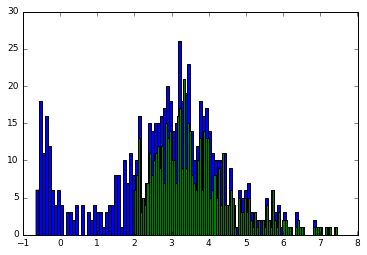

In [13]:
# Largest leftward saccades
range_start_22H05 = quantile_ranges_22H05[1]
range_stop_22H05 = quantile_ranges_22H05[0]
# pull out data
data_chunk = np.array(selected_saccades_22H05['i1'][range_start_22H05:range_stop_22H05,:])
# get amplitude based on peak index
amps = np.mean(data_chunk[:,49:51],axis = 1)
# threshold into two groups
highamps = amps > 2
lns = plb.hist(amps,bins = 100)
lns = plb.hist(amps[highamps],bins = 100)

In [15]:
fly_nums = selected_saccades_22H05['fly_numbers'][range_start_22H05:range_stop_22H05]
print sorted(set(fly_nums[highamps]))
print sorted(set(fly_nums[~highamps]))

[308, 309, 310, 311, 312, 314, 315, 316, 317, 327, 328, 453, 455, 456, 461, 462, 463, 466, 467, 468, 469, 470]
[308, 309, 310, 311, 312, 314, 315, 316, 317, 327, 328, 453, 455, 461, 462, 463, 466, 467, 468, 469, 470]


# lin vs nonlinear example

In [16]:
mtd_22H05 = h5py.File('../04_process_open_loop_cohort1/open_loop_trial_db_22H05.hdf5','r')
def get_selection_mtrx(trial):
    selection = trial_names == trial
    norms = np.array(mtd_22H05['signal_norms']['Ph2'][selection])
    return np.array(mtd_22H05['normed_signals']['Ph2'][selection,:])*norms[:,None]

# load the example trial shown in the open_loop_motion analysis figure
#example_trial = 2
example_trial = 4
sub_samples = 20

trial_names = np.array(mtd_22H05['selected_signals']['trial_names'])
data_selection = get_selection_mtrx('yaw_left')
down_samp_idx = np.linspace(2,data_selection.shape[0]-2,sub_samples).astype(int)
example_signal = data_selection[down_samp_idx,:][example_trial,:]
import flylib as flb
import scipy
xi = gd.get_xio('yaw_left')
############################
############################
## from the roc analysis 
ks = 81, 
ms = 34,
ms = 9
thresh = 0.15384615384615385
############################
############################

#plb.subplot(3,2,2,sharey = plb.gca())
from scipy import signal
#plb.plot(xi,example_signal,'k')
#plb.gca().set_xbound(-10,10)
#plb.gca().set_title('Non-linear (statistical) filter')

trend = signal.medfilt(example_signal,kernel_size = ks)
detrend = example_signal-trend
detrend_smooth = signal.wiener(detrend,mysize = ms)
noise = detrend - detrend_smooth
#noise = detrend-noise

#plb.axhline(thresh,color = 'k',ls = '--')
#plb.axhline(thresh*-1,color = 'k',ls = '--')

#plb.gca().set_xbound(-10,10)
#plb.subplot(3,2,6,sharey = plb.gca())
#plb.gca().set_xbound(-10,10)

#plb.plot(xi,detrend-detrend_smooth,'b')
#plb.gca().set_ybound(-2,6)
#plb.gca().set_xbound(-10,10)
#for ax in plb.gcf().axes:
#    plb.sca(ax)

#plb.gca().set_xbound(-10,10)
#plf.pull_ax_spines(left= False)

In [17]:
percentile_ranges_22H05 = np.linspace(0,np.shape(selected_saccades_22H05['Ph2'])[0],100).astype(int)[::-1]
top30_percentile_brackets_22H05 = zip(percentile_ranges_22H05[5:35:5],percentile_ranges_22H05[0:30:5])
bottom30_percentile_brackets_22H05 = zip(percentile_ranges_22H05[74:105:5],percentile_ranges_22H05[70:100:5])

percentile_ranges_39E01 = np.linspace(0,np.shape(selected_saccades_39E01['Ph2'])[0],100).astype(int)[::-1]
top30_percentile_brackets_39E01 = zip(percentile_ranges_39E01[5:35:5],percentile_ranges_39E01[0:30:5])
bottom30_percentile_brackets_39E01 = zip(percentile_ranges_39E01[74:105:5],percentile_ranges_39E01[70:100:5])

def get_kde(data_chunk):
    from sklearn.neighbors import KernelDensity
    X = np.mean(data_chunk[:,0:10],axis = 1)[:,None] - np.mean(data_chunk[:,49:51],axis = 1)[:,None]
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X)
    X_plot = np.linspace(-8, 8, 100)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    return X_plot,np.exp(log_dens)

def plot_top30_percentiles(col,row):
    if col < 9:
        range_start,range_stop = top30_percentile_brackets_22H05[row]
        data_chunk = selected_saccades_22H05[trace_keys[col]][range_start:range_stop,:]
    else:
        range_start,range_stop = top30_percentile_brackets_39E01[row]
        data_chunk = selected_saccades_39E01[trace_keys[col]][range_start:range_stop,:]
    plb.plot(*get_kde(data_chunk),color = 'k',clip_on = False)
    
def plot_bottom30_percentiles(col,row):
    if col < 9:
        range_start,range_stop = bottom30_percentile_brackets_22H05[row]
        data_chunk = selected_saccades_22H05[trace_keys[col]][range_start:range_stop,:]
    else:
        range_start,range_stop = bottom30_percentile_brackets_39E01[row]
        data_chunk = selected_saccades_39E01[trace_keys[col]][range_start:range_stop,:]
    plb.plot(*get_kde(data_chunk),color = 'k',clip_on = False)

# Group data frequency breakdown

In [23]:
import findsaccade as fsac
mtd_22H05 = h5py.File('../04_process_open_loop_cohort1/open_loop_trial_db_22H05.hdf5','r')
chosen_settings

{'ksizes': 81,
 'mode': 'non_linear',
 'mysizes': 34,
 'thresh_vals': 0.15384615384615385}

## raster images by frequency

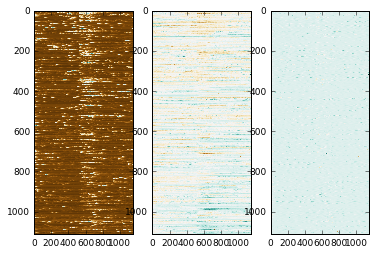

In [24]:
plb.subplot(1,3,1)
plb.imshow(np.array(mtd_22H05['normed_signals']['i1']))
plb.subplot(1,3,2)
plb.imshow(np.array(mtd_22H05['normed_signals']['Ph1']))
plb.subplot(1,3,3)
plb.imshow(fsac.filter_mtrx_nonlinear(np.array(mtd_22H05['normed_signals']['Ph1']),
                           kernel_size = 81,mysize = 34))

In [26]:
frwing = fsac.filter_mtrx_nonlinear(np.array(mtd_22H05['normed_signals']['Ph1']),
                           kernel_size = 81,mysize = 34)

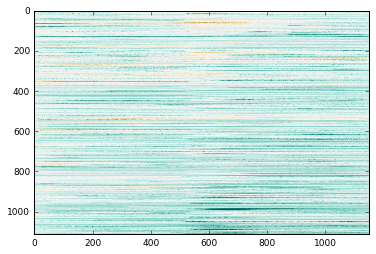

In [27]:
plb.imshow(np.array(mtd_22H05['normed_signals']['Ph1'])-frwing)

## cross covariance by frequency

In [28]:
import scipy.signal
scor_i1 = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(frwing,np.array(mtd_22H05['normed_signals']['i1']))]
lcor_i1 = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(np.array(mtd_22H05['normed_signals']['Ph1'])-frwing,
                                                      np.array(mtd_22H05['normed_signals']['i1']))]
fcor_i1 = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(np.array(mtd_22H05['normed_signals']['Ph1']),
                                                      np.array(mtd_22H05['normed_signals']['i1']))]

In [29]:
scor_i2 = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(frwing,np.array(mtd_22H05['normed_signals']['i2']))]
lcor_i2 = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(np.array(mtd_22H05['normed_signals']['Ph1'])-frwing,
                                                      np.array(mtd_22H05['normed_signals']['i2']))]
fcor_i2 = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(np.array(mtd_22H05['normed_signals']['Ph1']),
                                                      np.array(mtd_22H05['normed_signals']['i2']))]

In [30]:
scor_b3 = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(frwing,np.array(mtd_22H05['normed_signals']['b3']))]
lcor_b3 = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(np.array(mtd_22H05['normed_signals']['Ph1'])-frwing,
                                                      np.array(mtd_22H05['normed_signals']['b3']))]
fcor_b3 = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(np.array(mtd_22H05['normed_signals']['Ph1']),
                                                      np.array(mtd_22H05['normed_signals']['b3']))]

In [31]:
scor_b2 = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(frwing,np.array(mtd_22H05['normed_signals']['b2']))]
lcor_b2 = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(np.array(mtd_22H05['normed_signals']['Ph1'])-frwing,
                                                      np.array(mtd_22H05['normed_signals']['b2']))]
fcor_b2 = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(np.array(mtd_22H05['normed_signals']['Ph1']),
                                                      np.array(mtd_22H05['normed_signals']['b2']))]

In [32]:
scor_w = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(frwing,
                                                      frwing)]
lcor_w = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(np.array(mtd_22H05['normed_signals']['Ph1'])-frwing,
                                                      np.array(mtd_22H05['normed_signals']['Ph1'])-frwing)]
fcor_w = [scipy.signal.correlate(x,y,mode = 'same') for x,y in zip(np.array(mtd_22H05['normed_signals']['Ph1']),
                                                      np.array(mtd_22H05['normed_signals']['Ph1']))]

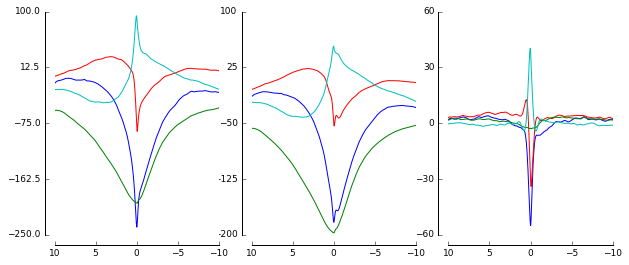

In [33]:
xi = gd.get_xio('yaw_left')
xi_xcor = (np.linspace(0,(xi[-1]-xi[0]),len(xi)) - ((xi[-1]-xi[0])/2.0))[::-1]

xi_xcor = (np.linspace(0,(xi[-1]-xi[0]),len(xi)) - ((xi[-1]-xi[0])/2.0))[::-1]
fig = plb.figure(figsize = (10,4))
plb.subplot(1,3,2)
plb.plot(xi_xcor,np.mean(lcor_i1,axis = 0))
plb.plot(xi_xcor,np.mean(lcor_i2,axis = 0))
plb.plot(xi_xcor,np.mean(lcor_b3,axis = 0))
plb.plot(xi_xcor,np.mean(lcor_b2,axis = 0))

plb.subplot(1,3,3,sharex = plb.gca())
plb.plot(xi_xcor,np.mean(scor_i1,axis = 0))
plb.plot(xi_xcor,np.mean(scor_b3,axis = 0),color = 'r')
plb.plot(xi_xcor,np.mean(scor_i2,axis = 0))
plb.plot(xi_xcor,np.mean(scor_b2,axis = 0),color = 'c')


plb.subplot(1,3,1,sharex = plb.gca())
plb.plot(xi_xcor,np.mean(fcor_i1,axis = 0))
plb.plot(xi_xcor,np.mean(fcor_i2,axis = 0))
plb.plot(xi_xcor,np.mean(fcor_b3,axis = 0))
plb.plot(xi_xcor,np.mean(fcor_b2,axis = 0))

for ax in plb.gcf().get_axes():
    plb.sca(ax)
    plf.pull_ax_spines()
    plb.xlim(10,-10)

# Analysis of bimodal deciles

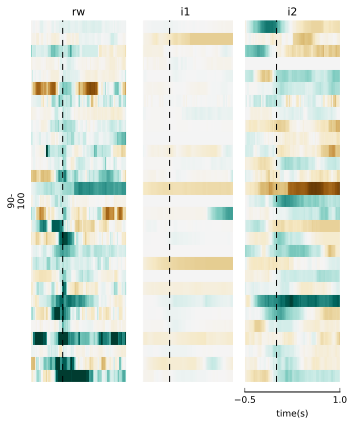

In [23]:
#trace_data = [traces_lmr,traces_rw,traces_b2,traces_b3,traces_i1]
trace_keys = ['Ph1','i1','i2']

quantile_ranges_22H05 = np.linspace(0,np.shape(selected_saccades_22H05['Ph2'])[0],11).astype(int)[::-1]
quantile_ranges_39E01 = np.linspace(0,np.shape(selected_saccades_39E01['Ph2'])[0],11).astype(int)[::-1]

def show_saccade_img(col,row):
    """plot function for saccade quantile plots"""
    imdx = 100
    range_start = quantile_ranges_22H05[-1]
    range_stop = quantile_ranges_22H05[-5]

    data_chunk = np.array(selected_saccades_22H05[trace_keys[col]][range_start:range_stop,:])
    data_chunk -= np.mean(data_chunk[:,:30],axis = 1)[:,np.newaxis]
    if trace_keys[col] == 'i1':
        plb.imshow(data_chunk[::imdx,25:][::-1],
           aspect = 'auto',interpolation = 'nearest',
           vmin =-7,vmax = 7,
           extent = [-20*.021,50*.021,-4,4],
           cmap = plb.cm.BrBG)
    else:
        plb.imshow(data_chunk[::imdx,25:][::-1],
           aspect = 'auto',interpolation = 'nearest',
           vmin =-2,vmax = 2,
           extent = [-25*.021,50*.021,-4,4],
           cmap = plb.cm.BrBG)

rows = 1
cols = 3

show_spines_right = [False]*rows;show_spines_right[0] = True
show_spines_bottom = [False]*cols;show_spines_bottom[-1] = True
col_labels_bottom = [None]*cols;col_labels_bottom[-1] = 'time(s)'
row_labels_left = ['%s-\n%s'%(p) for p in [(90,100),(70,80),(20,30),(0,10)]]
col_labels_top = ['rw','i1','i2']

ax_grid,row_epoch_panels,col_epoch_panels  = plf.plot_data_matrix(rows = rows,cols = cols,
                                  plot_panel_function = show_saccade_img,
                                  figsize = (5.0,6.0),
                                  xbounds = (-.5,1),
                                  ybounds = (-4,4),
                                  row_labels_left = row_labels_left,
                                  col_labels_bottom = col_labels_bottom,
                                  col_labels_top = col_labels_top,
                                  xtick_numbers = 2,
                                  show_spines_top = False,
                                  show_spines_left = False,
                                  show_spines_right = False,
                                  col_axvlines = 0,
                                  col_axvlines_kwargs = {'ls':'--','color':'k'},
                                  show_spines_bottom = show_spines_bottom)
[ax.set_zorder(np.inf) for ax in col_epoch_panels]
#plb.show()
plb.savefig('STAs_extrema_rasters_22H05.pdf')

### pentiles within deciles

In [24]:
demo_mode = False

In [22]:
if not(True):
    signals_to_search = ['Ph2','Ph1','b1','b2','b3','i1','i2','hg1','hg4']

    percentile_ranges_22H05 = np.linspace(0,np.shape(selected_saccades_22H05['Ph2'])[0],100).astype(int)[::-1]
    top30_percentile_brackets_22H05 = zip(percentile_ranges_22H05[5:35:5],percentile_ranges_22H05[0:30:5])
    bottom30_percentile_brackets_22H05 = zip(percentile_ranges_22H05[74:105:5],percentile_ranges_22H05[70:100:5])
    bw_search = list()

    from sklearn.neighbors import KernelDensity
    from sklearn.grid_search import GridSearchCV

    for bracket in range(6):
        range_start,range_stop = top30_percentile_brackets[bracket]
        for sig in signals_to_search:
            data_chunk = np.array(sorted_saccades[sig][range_start:range_stop,:])
            X = np.mean(data_chunk[:,49:51],axis = 1)[:, np.newaxis]
            grid = GridSearchCV(KernelDensity(),
                        {'bandwidth': np.linspace(0.1, 1.0, 30)},
                        cv=20) # 20-fold cross-validation
            grid.fit(X)
            bw =  grid.best_params_['bandwidth']
            bw_search.append(bw)

    for bracket in range(6):
        range_start,range_stop = top30_percentile_brackets[bracket]
        for sig in signals_to_search:
            print sig
            data_chunk = np.array(sorted_saccades[sig][range_start:range_stop,:])
            X = np.mean(data_chunk[:,49:51],axis = 1)[:, np.newaxis]
            grid = GridSearchCV(KernelDensity(),
                        {'bandwidth': np.linspace(0.1, 1.0, 30)},
                        cv=20) # 20-fold cross-validation
            grid.fit(X)
            bw =  grid.best_params_['bandwidth']
            bw_search.append(bw)
    bandwidth = np.mean(bw_search)        
    print np.mean(bw_search)
else:
    #percentile_ranges = np.linspace(0,np.shape(sorted_saccades['Ph2'])[0],100).astype(int)[::-1]
    #top30_percentile_brackets = zip(percentile_ranges[5:35:5],percentile_ranges[0:30:5])
    #bottom30_percentile_brackets = zip(percentile_ranges[74:105:5],percentile_ranges[70:100:5])
    #bandwidth = 0.365862068966
    pass

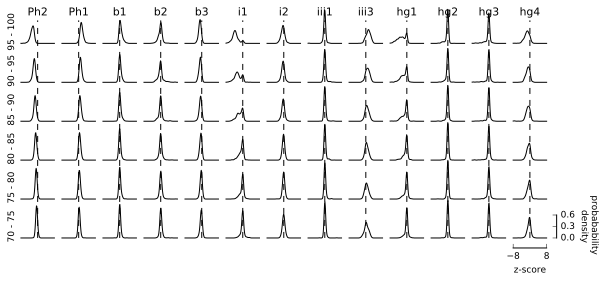

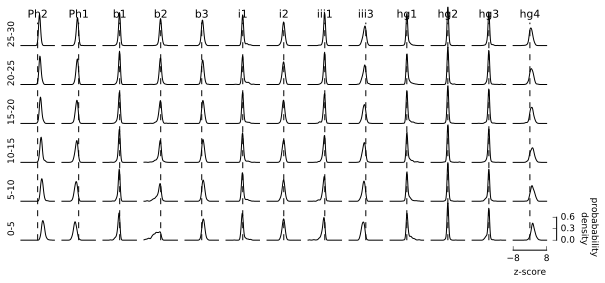

In [25]:
reload(plf)
trace_keys = ['Ph2','Ph1','b1','b2','b3','i1','i2','iii1','iii3','hg1','hg2','hg3','hg4']

bandwidth = 0.365862068966

percentile_ranges_22H05 = np.linspace(0,np.shape(selected_saccades_22H05['Ph2'])[0],100).astype(int)[::-1]
top30_percentile_brackets_22H05 = zip(percentile_ranges_22H05[5:35:5],percentile_ranges_22H05[0:30:5])
bottom30_percentile_brackets_22H05 = zip(percentile_ranges_22H05[74:105:5],percentile_ranges_22H05[70:100:5])

percentile_ranges_39E01 = np.linspace(0,np.shape(selected_saccades_39E01['Ph2'])[0],100).astype(int)[::-1]
top30_percentile_brackets_39E01 = zip(percentile_ranges_39E01[5:35:5],percentile_ranges_39E01[0:30:5])
bottom30_percentile_brackets_39E01 = zip(percentile_ranges_39E01[74:105:5],percentile_ranges_39E01[70:100:5])

def get_kde(data_chunk):
    from sklearn.neighbors import KernelDensity
    X = np.mean(data_chunk[:,0:10],axis = 1)[:,None] - np.mean(data_chunk[:,49:51],axis = 1)[:,None]
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X)
    X_plot = np.linspace(-8, 8, 100)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    return X_plot,np.exp(log_dens)

def plot_top30_percentiles(col,row):
    if col < 9:
        range_start,range_stop = top30_percentile_brackets_22H05[row]
        data_chunk = selected_saccades_22H05[trace_keys[col]][range_start:range_stop,:]
    else:
        range_start,range_stop = top30_percentile_brackets_39E01[row]
        data_chunk = selected_saccades_39E01[trace_keys[col]][range_start:range_stop,:]
    plb.plot(*get_kde(data_chunk),color = 'k',clip_on = False)
    
def plot_bottom30_percentiles(col,row):
    if col < 9:
        range_start,range_stop = bottom30_percentile_brackets_22H05[row]
        data_chunk = selected_saccades_22H05[trace_keys[col]][range_start:range_stop,:]
    else:
        range_start,range_stop = bottom30_percentile_brackets_39E01[row]
        data_chunk = selected_saccades_39E01[trace_keys[col]][range_start:range_stop,:]
    plb.plot(*get_kde(data_chunk),color = 'k',clip_on = False)

rows = 6
cols = len(trace_keys)
show_spines_right = [False]*rows; show_spines_right[-1] = True
show_spines_bottom = [False]*cols; show_spines_bottom[-1] = True
col_labels_bottom = [None]*cols;col_labels_bottom[-1] = 'z-score'
row_labels_right = [None]*rows;row_labels_right[-1] = 'probabability \ndensity'

col_labels_top =  cp.copy(trace_keys)

ax_grid,row_epoch_panels,col_epoch_panels  = plf.plot_data_matrix(rows = rows,cols = cols,
                                  plot_panel_function = plot_top30_percentiles,
                                  figsize = (8.5,4),
                                  xbounds = (-8,8),
                                  ybounds = (0,0.6),
                                  row_labels_left = ['%s - %s'%(p) for 
                                                     p in zip(range(70,100,5),range(75,105,5))[::-1]],
                                  col_labels_bottom = col_labels_bottom,
                                  col_labels_top = col_labels_top,
                                  xtick_numbers = 2,
                                  show_spines_top = False,
                                  show_spines_left = False,
                                  col_axvlines = 0,
                                  col_axvlines_kwargs = {'ls':'--','color':'k'},
                                  show_spines_right = show_spines_right,
                                  show_spines_bottom = show_spines_bottom,
                                  row_labels_right = row_labels_right)
plb.savefig('STA_kde_top30_39E01.pdf')

ax_grid,row_epoch_panels,col_epoch_panels  = plf.plot_data_matrix(rows = rows,cols = cols,
                                  plot_panel_function = plot_bottom30_percentiles,
                                  figsize = (8.5,4),
                                  xbounds = (-8,8),
                                  ybounds = (0,0.6),
                                  row_labels_left = ['%s-%s'%(p) for 
                                                     p in zip(range(0,30,5),range(5,35,5))[::-1]],
                                  col_labels_bottom = col_labels_bottom,
                                  col_labels_top = col_labels_top,
                                  xtick_numbers = 2,
                                  show_spines_top = False,
                                  show_spines_left = False,
                                  col_axvlines = 0,
                                  col_axvlines_kwargs = {'ls':'--','color':'k'},
                                  show_spines_right = show_spines_right,
                                  show_spines_bottom = show_spines_bottom,
                                  row_labels_right = row_labels_right)
plb.savefig('STA_kde_bottom30_39E01.pdf')

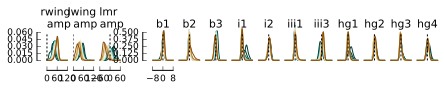

In [29]:
reload(plf)

#trace_keys = ['Ph1','Ph0','Ph2','b1','b2','b3','i1','i2','hg1','hg4']

from matplotlib.gridspec import GridSpec

trace_keys = ['Ph1','Ph0','Ph2','','b1','b2','b3','i1','i2','iii1','iii3','hg1','hg2','hg3','hg4']
gs = GridSpec(2,len(trace_keys))

ax_list = list()
fig = plb.figure(figsize = (7.0,0.5))
for i in range(len(trace_keys)):
    ax_list.append(fig.add_subplot(gs[:,i]))
    
#bandwidth = 0.365862068966
#bandwidth = 0.2
bandwidth = 0.6

percentile_ranges_22H05 = np.linspace(0,np.shape(sorted_saccades_22H05['Ph2'])[0],100).astype(int)[::-1]
decile_brackets_22H05 = zip(percentile_ranges_22H05[9:110:10],percentile_ranges_22H05[0:100:10])

def get_kde(data_chunk,xrng = [-8,8],bandwidth = 0.2):
    from sklearn.neighbors import KernelDensity
    X = np.mean(data_chunk[:,49:51],axis = 1)[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X)
    X_plot = np.linspace(xrng[0], xrng[1], 100)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    return X_plot,np.exp(log_dens)

def plot_descile_hists(col,row):
    if row == 0:
        skey = trace_keys[col]
        if skey in ['Ph0','Ph1','Ph2']:
            xrng = [90,180]
            for range_start,range_stop in decile_brackets_22H05[::]:
                c = plb.cm.BrBG(float(range_stop)/decile_brackets_22H05[1][-1])
                data_chunk = np.array(sorted_saccades_22H05[skey][range_start:range_stop,:])
                mkey = {'Ph0':'lwing_mean','Ph1':'rwing_mean','Ph2':'lmr_mean'}[skey]
                nkey = {'Ph0':'lwing_norm','Ph1':'rwing_norm','Ph2':'lmr_norms'}[skey]
                data_chunk *= np.array(sorted_saccades_22H05[nkey][range_start:range_stop])[:,None]
                data_chunk += np.array(sorted_saccades_22H05[mkey][range_start:range_stop])[:,None]
                data_chunk = gd.signal_plot_info[skey]['transform'](data_chunk)
                if skey in ['Ph0','Ph1']:
                    plb.plot(*get_kde(data_chunk,xrng = [0,120],bandwidth = 2.5),color = c,clip_on = False)
                else:
                    plb.plot(*get_kde(data_chunk,xrng = [-60,60],bandwidth = 2.5),color = c,clip_on = False)
        elif skey in ['']:
            pass
        else:
            for range_start,range_stop in decile_brackets_22H05[::]:
                c = plb.cm.BrBG(float(range_stop)/decile_brackets_22H05[1][-1])
                data_chunk = sorted_saccades_22H05[skey][range_start:range_stop,:]
                plb.plot(*get_kde(data_chunk,bandwidth = bandwidth),color = c,clip_on = False)

rows = 1
cols = len(trace_keys)
show_spines_right = [False]*rows; show_spines_right[-1] = True;
show_spines_left = [False]*cols; show_spines_left[0] = True;show_spines_left[4] = True; 
show_spines_bottom = [False]*cols; show_spines_bottom[0:3] = [True]*3
show_spines_bottom[4] = True

col_labels_bottom = [None]*cols;col_labels_bottom[-1] = 'z-score';col_labels_bottom[2] = 'saccade \n magnitude (deg)'
row_labels_left = [None]*rows;row_labels_left[0] = 'probabability \ndensity'

for x in trace_keys:
    try:
        lb = gd.signal_plot_info[x]['ax_label']
    except KeyError:
        lb = ''
    col_labels_top.append(lb)

ybounds_left = [(0,0.5)]*cols;ybounds_left[:3] = [(0,0.06)]*3
yticks_left = [np.linspace(0,0.5,3)]*cols;yticks_left[:3] = [np.linspace(0,0.06,3)]*3
xticks_bottom = [np.linspace(-8,8,3)]*cols;xticks_bottom[:2] = [np.linspace(0,120,3)]*2;
xticks_bottom[2] = np.linspace(-60,60,3);

for row in range(rows):
    for col in range(cols):
        plb.sca(ax_list[col])
        plot_descile_hists(col,row)
        plb.gca().set_ybound(ybounds_left[col])
        plb.yticks(yticks_left[col])
        plf.pull_ax_spines(bottom = show_spines_bottom[col],left = show_spines_left[col])
        plb.xticks(xticks_bottom[col])
        try:
            plb.gca().set_title(gd.signal_plot_info[trace_keys[col]]['ax_label'])
            plb.axvline(0,**{'ls':'--','color':'k','dashes':(2,2)})
        except KeyError:
            pass
plb.subplots_adjust(wspace = 0.3,hspace = 0.1)        
plb.savefig('STA_kde_22H05.pdf')

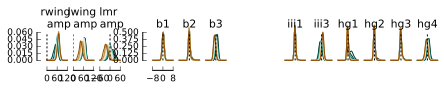

In [30]:
reload(plf)

#trace_keys = ['Ph1','Ph0','Ph2','b1','b2','b3','i1','i2','hg1','hg4']

from matplotlib.gridspec import GridSpec

trace_keys = ['Ph1','Ph0','Ph2','','b1','b2','b3','','','iii1','iii3','hg1','hg2','hg3','hg4']
gs = GridSpec(2,len(trace_keys))

ax_list = list()
fig = plb.figure(figsize = (7.0,0.5))
for i in range(len(trace_keys)):
    ax_list.append(fig.add_subplot(gs[:,i]))
    
#bandwidth = 0.365862068966
#bandwidth = 0.2
bandwidth = 0.6

percentile_ranges_39E01 = np.linspace(0,np.shape(sorted_saccades_39E01['Ph2'])[0],100).astype(int)[::-1]
decile_brackets_39E01 = zip(percentile_ranges_39E01[9:110:10],percentile_ranges_39E01[0:100:10])

def get_kde(data_chunk,xrng = [-8,8],bandwidth = 0.2):
    from sklearn.neighbors import KernelDensity
    X = np.mean(data_chunk[:,49:51],axis = 1)[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X)
    X_plot = np.linspace(xrng[0], xrng[1], 100)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    return X_plot,np.exp(log_dens)

def plot_descile_hists(col,row):
    if row == 0:
        skey = trace_keys[col]
        if skey in ['Ph0','Ph1','Ph2']:
            xrng = [90,180]
            for range_start,range_stop in decile_brackets_39E01[::]:
                c = plb.cm.BrBG(float(range_stop)/decile_brackets_39E01[1][-1])
                data_chunk = np.array(sorted_saccades_39E01[skey][range_start:range_stop,:])
                mkey = {'Ph0':'lwing_mean','Ph1':'rwing_mean','Ph2':'lmr_mean'}[skey]
                nkey = {'Ph0':'lwing_norm','Ph1':'rwing_norm','Ph2':'lmr_norms'}[skey]
                data_chunk *= np.array(sorted_saccades_39E01[nkey][range_start:range_stop])[:,None]
                data_chunk += np.array(sorted_saccades_39E01[mkey][range_start:range_stop])[:,None]
                data_chunk = gd.signal_plot_info[skey]['transform'](data_chunk)
                if skey in ['Ph0','Ph1']:
                    plb.plot(*get_kde(data_chunk,xrng = [0,120],bandwidth = 2.5),color = c,clip_on = False)
                else:
                    plb.plot(*get_kde(data_chunk,xrng = [-60,60],bandwidth = 2.5),color = c,clip_on = False)
        elif skey in ['']:
            pass
        else:
            for range_start,range_stop in decile_brackets_39E01[::]:
                c = plb.cm.BrBG(float(range_stop)/decile_brackets_39E01[1][-1])
                data_chunk = sorted_saccades_39E01[skey][range_start:range_stop,:]
                plb.plot(*get_kde(data_chunk,bandwidth = bandwidth),color = c,clip_on = False)

rows = 1
cols = len(trace_keys)
show_spines_right = [False]*rows; show_spines_right[-1] = True;
show_spines_left = [False]*cols; show_spines_left[0] = True;show_spines_left[4] = True; 
show_spines_bottom = [False]*cols; show_spines_bottom[0:3] = [True]*3
show_spines_bottom[4] = True

col_labels_bottom = [None]*cols;col_labels_bottom[-1] = 'z-score';col_labels_bottom[2] = 'saccade \n magnitude (deg)'
row_labels_left = [None]*rows;row_labels_left[0] = 'probabability \ndensity'

for x in trace_keys:
    try:
        lb = gd.signal_plot_info[x]['ax_label']
    except KeyError:
        lb = ''
    col_labels_top.append(lb)

ybounds_left = [(0,0.5)]*cols;ybounds_left[:3] = [(0,0.06)]*3
yticks_left = [np.linspace(0,0.5,3)]*cols;yticks_left[:3] = [np.linspace(0,0.06,3)]*3
xticks_bottom = [np.linspace(-8,8,3)]*cols;xticks_bottom[:2] = [np.linspace(0,120,3)]*2;
xticks_bottom[2] = np.linspace(-60,60,3);

for row in range(rows):
    for col in range(cols):
        plb.sca(ax_list[col])
        plot_descile_hists(col,row)
        plb.gca().set_ybound(ybounds_left[col])
        plb.yticks(yticks_left[col])
        plf.pull_ax_spines(bottom = show_spines_bottom[col],left = show_spines_left[col])
        plb.xticks(xticks_bottom[col])
        try:
            plb.gca().set_title(gd.signal_plot_info[trace_keys[col]]['ax_label'])
            plb.axvline(0,**{'ls':'--','color':'k','dashes':(2,2)})
        except KeyError:
            pass
plb.subplots_adjust(wspace = 0.3,hspace = 0.1)        
plb.savefig('STA_kde_39E01.pdf')

In [41]:
range_start,range_stop = decile_brackets_22H05[-1]
#range_start_,range_stop = decile_brackets_22H05[-5]

In [42]:
def resample_ts_ci(dataset,nsamples = 100):
    synthetic_means = np.zeros([nsamples,np.shape(dataset)[1]])
    idxs = np.arange(np.shape(dataset)[0])
    for i in range(nsamples):
        synthetic_means[i,:] = np.mean(dataset[np.random.choice(idxs,size = len(idxs)),:],axis = 0)
    ub = np.nanpercentile(synthetic_means,97.5,axis = 0)
    lb = np.nanpercentile(synthetic_means,2.5,axis = 0)
    mean = np.mean(dataset,axis =0)
    return ub,lb,mean

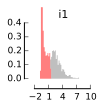

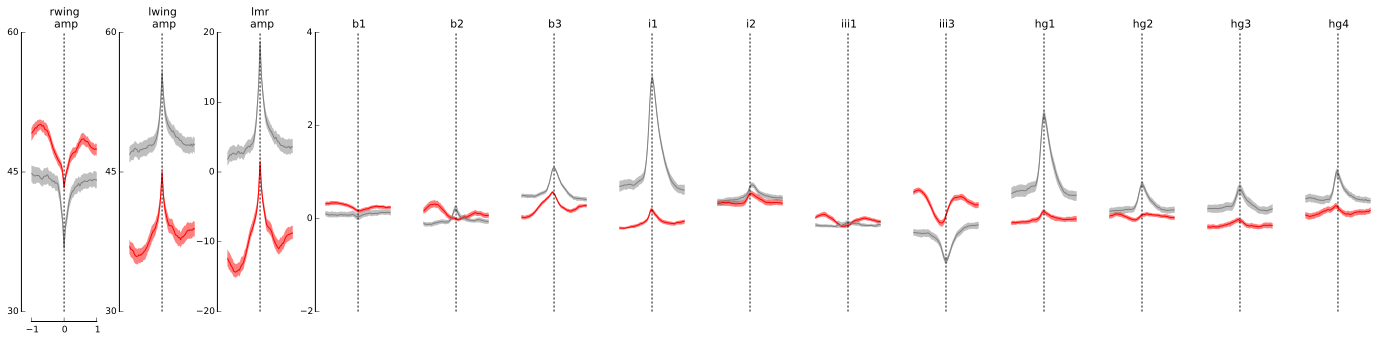

In [55]:
range_start,range_stop = decile_brackets_22H05[1]
#range_start,range_stop_ = decile_brackets_22H05[5]
plb.figure(figsize = (1,1))
idx_rng = np.arange(0,len(sorted_saccades_22H05['i1']))
range_mask = (idx_rng > range_start) & (idx_rng < range_stop)
mag_mask_i1_off = sorted_saccades_22H05['i1'][:,50] < 1.5
mag_mask_i1_on = sorted_saccades_22H05['i1'][:,50] > 1.5
i1_off = sorted_saccades_22H05['i1'][range_mask & mag_mask_i1_off][:,50]
i1_on = sorted_saccades_22H05['i1'][range_mask & mag_mask_i1_on][:,50]

plb.gca().set_xbound(-2,10)
plb.gca().set_ybound(0,0.4)

#lns = plb.hist([i1_off,i1_on],bins = np.linspace(-10,10,100),stacked = True,normed = True)

lns = plb.hist([i1_off,i1_on],bins = np.arange(-2,10,0.2),stacked = True,normed = True,
               histtype = 'stepfilled',clip_on = False,alpha = 0.5,lw = 0,color =('r','gray'))

plb.gca().set_xbound(-2,10)
plb.gca().set_ybound(0,0.4)
plf.pull_ax_spines()
plb.gca().set_title('i1')
plb.savefig('top_i1_amp_dist.pdf')

from matplotlib.gridspec import GridSpec

gs = GridSpec(2,len(trace_keys))

trace_keys = ['Ph1','Ph0','Ph2','b1','b2','b3','i1','i2','iii1','iii3','hg1','hg2','hg3','hg4']

ax_list = list()
fig = plb.figure(figsize = (24,5))

ax_list.append(fig.add_subplot(gs[:,0]))
ax_list.append(fig.add_subplot(gs[:,1]))
#ax_list.append([fig.add_subplot(gs[0,2]),fig.add_subplot(gs[1,2])])

for i in range(2,len(trace_keys)):
    ax_list.append(fig.add_subplot(gs[:,i]))

def plot_parsed_stas(col,row):
    xi = (np.arange(0,100)-50)*0.021
    try:
        sig_key = trace_keys[col]
        if sig_key in ['Ph1','Ph0']:
            plb.sca(ax_list[col])
            dataset = sorted_saccades_22H05[sig_key][range_mask & mag_mask_i1_off]
            nkey = {'Ph0':'lwing_norm','Ph1':'rwing_norm','Ph2':'lmr_norms'}[sig_key]
            mkey = {'Ph0':'lwing_mean','Ph1':'rwing_mean','Ph2':'lmr_mean'}[sig_key]
            snorms = sorted_saccades_22H05[nkey][range_mask & mag_mask_i1_off]
            smeans = sorted_saccades_22H05[mkey][range_mask & mag_mask_i1_off]
            dataset *= snorms[:,None]
            dataset += smeans[:,None]
            dataset = gd.signal_plot_info[sig_key]['transform'](dataset)

            ub,lb,mn = resample_ts_ci(dataset)
            plb.fill_between(xi,ub,lb,alpha = 0.5,edgecolor = 'none',facecolor = 'r')
            plb.plot(xi,mn,color = 'r')

            dataset = sorted_saccades_22H05[sig_key][range_mask & mag_mask_i1_on]
            snorms = sorted_saccades_22H05[nkey][range_mask & mag_mask_i1_on]
            smeans = sorted_saccades_22H05[mkey][range_mask & mag_mask_i1_on]
            dataset *= snorms[:,None]
            dataset += smeans[:,None]
            dataset = gd.signal_plot_info[sig_key]['transform'](dataset)

            ub,lb,mn = resample_ts_ci(dataset)
            plb.fill_between(xi,ub,lb,alpha = 0.5,edgecolor = 'none',facecolor = 'gray')
            plb.plot(xi,mn,color = 'gray');
            plb.gca().set_ybound(30,60)
            plb.gca().set_xbound(-1,1)
            if col == 0:
                plf.pull_ax_spines(bottom = True)
                plb.gca().set_xticks(np.linspace(-1,1,3))
            else:
                plf.pull_ax_spines(bottom = False)
            plb.axvline(ls='--',color='k',dashes=(2,2))
            plb.gca().set_yticks(np.linspace(30,60,3))
        elif sig_key in ['Ph2']:
            plb.sca(ax_list[col])
            dataset = sorted_saccades_22H05[sig_key][range_mask & mag_mask_i1_off]
            nkey = {'Ph0':'lwing_norm','Ph1':'rwing_norm','Ph2':'lmr_norms'}[sig_key]
            mkey = {'Ph0':'lwing_mean','Ph1':'rwing_mean','Ph2':'lmr_mean'}[sig_key]
            snorms = sorted_saccades_22H05[nkey][range_mask & mag_mask_i1_off]
            smeans = sorted_saccades_22H05[mkey][range_mask & mag_mask_i1_off]
            dataset *= snorms[:,None]
            dataset += smeans[:,None]
            dataset = gd.signal_plot_info[sig_key]['transform'](dataset)

            ub,lb,mn = resample_ts_ci(dataset)
            plb.fill_between(xi,ub,lb,alpha = 0.5,edgecolor = 'none',facecolor = 'r')
            plb.plot(xi,mn,color = 'r');plf.pull_ax_spines(bottom = False)
            
            dataset = sorted_saccades_22H05[sig_key][range_mask & mag_mask_i1_on]
            snorms = sorted_saccades_22H05[nkey][range_mask & mag_mask_i1_on]
            smeans = sorted_saccades_22H05[mkey][range_mask & mag_mask_i1_on]
            dataset *= snorms[:,None]
            dataset += smeans[:,None]
            dataset = gd.signal_plot_info[sig_key]['transform'](dataset)

            ub,lb,mn = resample_ts_ci(dataset)
            plb.fill_between(xi,ub,lb,alpha = 0.5,edgecolor = 'none',facecolor = 'gray')
            plb.plot(xi,mn,color = 'gray');
            plb.gca().set_ybound(-20,20)
            plb.gca().set_xbound(-1,1)
            plb.axvline(ls='--',color='k',dashes=(2,2))
            plf.pull_ax_spines(bottom = False)
        else:
            plb.sca(ax_list[col])
            dataset = sorted_saccades_22H05[sig_key][range_mask & mag_mask_i1_off]
            ub,lb,mn = resample_ts_ci(dataset)
            plb.fill_between(xi,ub,lb,alpha = 0.5,edgecolor = 'none',facecolor = 'r')
            plb.plot(xi,mn,color = 'r')
            dataset = sorted_saccades_22H05[sig_key][range_mask & mag_mask_i1_on]
            ub,lb,mn = resample_ts_ci(dataset)
            plb.fill_between(xi,ub,lb,alpha = 0.5,edgecolor = 'none',facecolor = 'gray')
            plb.plot(xi,mn,color = 'gray')
            plb.gca().set_ybound(-2,4)
            plb.gca().set_xbound(-1,1)
            if col == 3:
                plf.pull_ax_spines(bottom = False)
            else:
                plf.pull_ax_spines(bottom = False,left = False)
            plb.gca().set_yticks([-2,0,2,4])
            plb.axvline(ls='--',color='k',dashes=(2,2))
    except KeyError:
        plf.kill_spines()

rows = 1
cols = len(trace_keys)
show_spines_right = [False]*rows; show_spines_right[-1] = True;
show_spines_left = [False]*rows; show_spines_left[0] = True;
show_spines_bottom = [False]*cols;show_spines_bottom[0] = True
col_labels_bottom = [None]*cols;col_labels_bottom[0] = 'time (s)'
row_labels_left = [None]*rows;row_labels_left[0] = 'amplitude (deg)'
col_axvlines = [0]*cols;col_axvlines[3] = None

col_labels_top = list()
for i,x in enumerate(trace_keys):
    try:
        col_labels_top.append(gd.signal_plot_info[x]['ax_label'])
    except KeyError:
        col_labels_top.append(x)

for row in range(rows):
    for col in range(cols):
        plot_parsed_stas(col,row)

plb.subplots_adjust(wspace = 0.5,hspace = 0.1)
for ax,title in zip(ax_list,col_labels_top):
    ax.set_title(title)
plb.savefig('top_i1_stas.pdf')

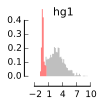

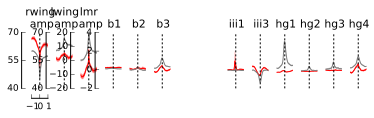

In [155]:
range_start,range_stop = decile_brackets_39E01[-1]
#range_start_,range_stop = decile_brackets_22H05[-5]
plb.figure(figsize = (1,1))
idx_rng = np.arange(0,len(sorted_saccades_39E01['hg1']))
range_mask = (idx_rng > range_start) & (idx_rng < range_stop)
mag_mask_hg1_off = sorted_saccades_39E01['hg1'][:,50] < 0.5
mag_mask_hg1_on = sorted_saccades_39E01['hg1'][:,50] > 0.5
hg1_off = sorted_saccades_39E01['hg1'][range_mask & mag_mask_hg1_off][:,50]
hg1_on = sorted_saccades_39E01['hg1'][range_mask & mag_mask_hg1_on][:,50]
lns = plb.hist([hg1_off,hg1_on],bins = np.arange(-2,10,0.2),stacked = True,normed = True,
               histtype = 'stepfilled',clip_on = False,alpha = 0.5,lw = 0,color =('r','gray'))
plb.gca().set_xbound(-2,10)
plb.gca().set_ybound(0,0.4)
plf.pull_ax_spines()
plb.gca().set_title('hg1')
plb.savefig('top_hg1_amp_dist.pdf')

from matplotlib.gridspec import GridSpec

gs = GridSpec(2,len(trace_keys))

trace_keys = ['Ph1','Ph0','Ph2','b1','b2','b3','','','iii1','iii3','hg1','hg2','hg3','hg4']

ax_list = list()
fig = plb.figure(figsize = (6,1))

ax_list.append(fig.add_subplot(gs[:,0]))
ax_list.append(fig.add_subplot(gs[:,1]))
#ax_list.append([fig.add_subplot(gs[0,2]),fig.add_subplot(gs[1,2])])

for i in range(2,len(trace_keys)):
    ax_list.append(fig.add_subplot(gs[:,i]))

def plot_parsed_stas(col,row):
    xi = (np.arange(0,100)-50)*0.021
    try:
        sig_key = trace_keys[col]
        if sig_key in ['Ph1','Ph0']:
            plb.sca(ax_list[col])
            dataset = sorted_saccades_39E01[sig_key][range_mask & mag_mask_hg1_off]
            nkey = {'Ph0':'lwing_norm','Ph1':'rwing_norm','Ph2':'lmr_norms'}[sig_key]
            mkey = {'Ph0':'lwing_mean','Ph1':'rwing_mean','Ph2':'lmr_mean'}[sig_key]
            snorms = sorted_saccades_39E01[nkey][range_mask & mag_mask_hg1_off]
            smeans = sorted_saccades_39E01[mkey][range_mask & mag_mask_hg1_off]
            dataset *= snorms[:,None]
            dataset += smeans[:,None]
            dataset = gd.signal_plot_info[sig_key]['transform'](dataset)

            ub,lb,mn = resample_ts_ci(dataset)
            plb.fill_between(xi,ub,lb,alpha = 0.5,edgecolor = 'none',facecolor = 'r')
            plb.plot(xi,mn,color = 'r')

            dataset = sorted_saccades_39E01[sig_key][range_mask & mag_mask_hg1_on]
            snorms = sorted_saccades_39E01[nkey][range_mask & mag_mask_hg1_on]
            smeans = sorted_saccades_39E01[mkey][range_mask & mag_mask_hg1_on]
            dataset *= snorms[:,None]
            dataset += smeans[:,None]
            dataset = gd.signal_plot_info[sig_key]['transform'](dataset)

            ub,lb,mn = resample_ts_ci(dataset)
            plb.fill_between(xi,ub,lb,alpha = 0.5,edgecolor = 'none',facecolor = 'gray')
            plb.plot(xi,mn,color = 'gray');
            plb.gca().set_ybound(40,70)
            plb.gca().set_xbound(-1,1)
            if col == 0:
                plf.pull_ax_spines(bottom = True)
                plb.gca().set_xticks(np.linspace(-1,1,3))
            else:
                plf.pull_ax_spines(bottom = False)
            plb.axvline(ls='--',color='k',dashes=(2,2))
            plb.gca().set_yticks(np.linspace(40,70,3))

        
        elif sig_key in ['Ph2']:
            plb.sca(ax_list[col])
            dataset = sorted_saccades_39E01[sig_key][range_mask & mag_mask_hg1_off]
            nkey = {'Ph0':'lwing_norm','Ph1':'rwing_norm','Ph2':'lmr_norms'}[sig_key]
            mkey = {'Ph0':'lwing_mean','Ph1':'rwing_mean','Ph2':'lmr_mean'}[sig_key]
            snorms = sorted_saccades_39E01[nkey][range_mask & mag_mask_hg1_off]
            smeans = sorted_saccades_39E01[mkey][range_mask & mag_mask_hg1_off]
            dataset *= snorms[:,None]
            dataset += smeans[:,None]
            dataset = gd.signal_plot_info[sig_key]['transform'](dataset)

            ub,lb,mn = resample_ts_ci(dataset)
            plb.fill_between(xi,ub,lb,alpha = 0.5,edgecolor = 'none',facecolor = 'r')
            plb.plot(xi,mn,color = 'r');plf.pull_ax_spines(bottom = False)
            
            dataset = sorted_saccades_39E01[sig_key][range_mask & mag_mask_hg1_on]
            snorms = sorted_saccades_39E01[nkey][range_mask & mag_mask_hg1_on]
            smeans = sorted_saccades_39E01[mkey][range_mask & mag_mask_hg1_on]
            dataset *= snorms[:,None]
            dataset += smeans[:,None]
            dataset = gd.signal_plot_info[sig_key]['transform'](dataset)

            ub,lb,mn = resample_ts_ci(dataset)
            plb.fill_between(xi,ub,lb,alpha = 0.5,edgecolor = 'none',facecolor = 'gray')
            plb.plot(xi,mn,color = 'gray');
            plb.gca().set_ybound(-20,20)
            plb.gca().set_xbound(-1,1)
            plb.axvline(ls='--',color='k',dashes=(2,2))
            plf.pull_ax_spines(bottom = False)
        else:
            plb.sca(ax_list[col])
            dataset = sorted_saccades_39E01[sig_key][range_mask & mag_mask_hg1_off]
            ub,lb,mn = resample_ts_ci(dataset)
            plb.fill_between(xi,ub,lb,alpha = 0.5,edgecolor = 'none',facecolor = 'r')
            plb.plot(xi,mn,color = 'r')
            dataset = sorted_saccades_39E01[sig_key][range_mask & mag_mask_hg1_on]
            ub,lb,mn = resample_ts_ci(dataset)
            plb.fill_between(xi,ub,lb,alpha = 0.5,edgecolor = 'none',facecolor = 'gray')
            plb.plot(xi,mn,color = 'gray')
            plb.gca().set_ybound(-2,4)
            plb.gca().set_xbound(-1,1)
            if col == 3:
                plf.pull_ax_spines(bottom = False)
            else:
                plf.pull_ax_spines(bottom = False,left = False)
            plb.gca().set_yticks([-2,0,2,4])
            plb.axvline(ls='--',color='k',dashes=(2,2))
    except KeyError:
        plf.kill_spines()

rows = 1
cols = len(trace_keys)
show_spines_right = [False]*rows; show_spines_right[-1] = True;
show_spines_left = [False]*rows; show_spines_left[0] = True;
show_spines_bottom = [False]*cols;show_spines_bottom[0] = True
col_labels_bottom = [None]*cols;col_labels_bottom[0] = 'time (s)'
row_labels_left = [None]*rows;row_labels_left[0] = 'amplitude (deg)'
col_axvlines = [0]*cols;col_axvlines[3] = None

col_labels_top = list()
for i,x in enumerate(trace_keys):
    try:
        col_labels_top.append(gd.signal_plot_info[x]['ax_label'])
    except KeyError:
        col_labels_top.append(x)

for row in range(rows):
    for col in range(cols):
        plot_parsed_stas(col,row)

plb.subplots_adjust(wspace = 0.5,hspace = 0.1)
for ax,title in zip(ax_list,col_labels_top):
    ax.set_title(title)
plb.savefig('top_hg1_stas.pdf')

In [140]:
xi = gd.get_xio('yaw_left')
stim_mask = (xi[sorted_saccades_22H05['peak']] > 0.0) & (xi[sorted_saccades_22H05['peak']] < 3.0)
bsln_mask = (xi[sorted_saccades_22H05['peak']] > -3.0) & (xi[sorted_saccades_22H05['peak']] < 0.0)
yl_trial_mask = sorted_saccades_22H05['trial_names']  == 'yaw_left'
yr_trial_mask = sorted_saccades_22H05['trial_names']  == 'yaw_right'
td_trial_mask = sorted_saccades_22H05['trial_names']  == 'ascending'
tu_trial_mask = sorted_saccades_22H05['trial_names']  == 'descending'

In [296]:
set(sorted_saccades_22H05['trial_names'])

{'ascending',
 'descending',
 'progressive',
 'regressive',
 'yaw_left',
 'yaw_right'}

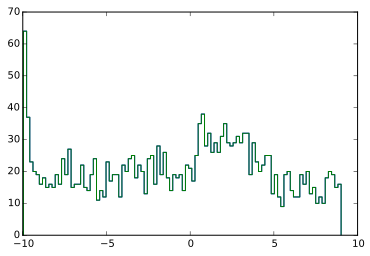

In [297]:

lns = plb.hist(xi[sorted_saccades_22H05['peak']][td_trial_mask],bins = 100,histtype='step')
lns = plb.hist(xi[sorted_saccades_22H05['peak']][td_trial_mask],bins = 100,histtype='step')

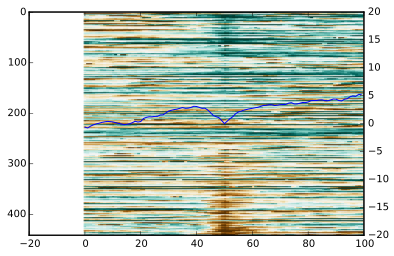

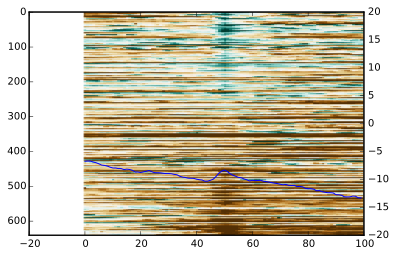

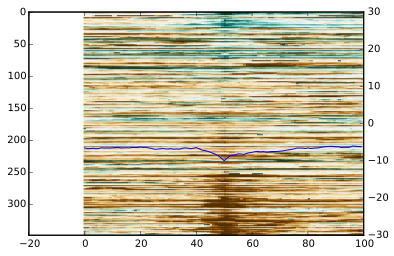

In [300]:
dtmtrx = np.array(sorted_saccades_22H05['lmr_natural'])[yl_trial_mask & stim_mask]
plb.imshow(dtmtrx,vmin = -30,vmax = 30)
plb.twinx()
plb.plot(np.mean(dtmtrx,axis = 0))
plb.gca().set_ybound(-20,20)
plb.figure()

dtmtrx = np.array(sorted_saccades_22H05['lmr_natural'])[yr_trial_mask & stim_mask]
plb.imshow(dtmtrx,vmin = -30,vmax = 30)
plb.twinx()
plb.plot(np.mean(dtmtrx,axis = 0))
plb.gca().set_ybound(-20,20)
plb.figure()

dtmtrx = np.array(sorted_saccades_22H05['lmr_natural'])[tu_trial_mask & bsln_mask]
plb.imshow(dtmtrx,vmin = -30,vmax = 30)
plb.twinx()
plb.plot(np.mean(dtmtrx,axis = 0))
plb.gca().set_ybound(-30,30)

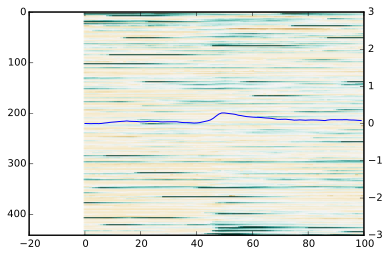

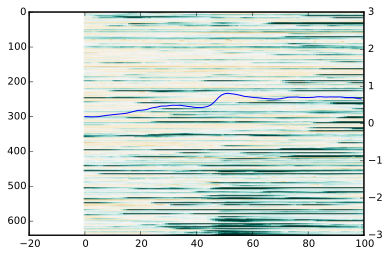

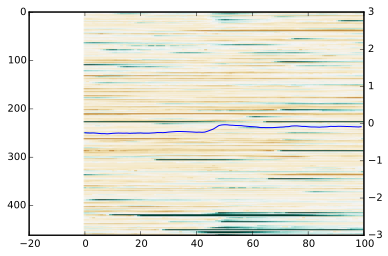

In [301]:
#dtmtrx = np.array(sorted_saccades_22H05['lw_natural'])[yl_trial_mask & stim_mask]
dtmtrx = np.array(sorted_saccades_22H05['b2'])[yl_trial_mask & stim_mask]
#dtmtrx -= np.nanmean(dtmtrx[:,:30],axis = 1)[:,None]
plb.imshow(dtmtrx,vmin = -3,vmax = 3)
plb.twinx()
plb.plot(np.mean(dtmtrx,axis = 0))
plb.gca().set_ybound(-3,3)
plb.figure()

#dtmtrx = np.array(sorted_saccades_22H05['lw_natural'])[yr_trial_mask & stim_mask]
dtmtrx = np.array(sorted_saccades_22H05['b2'])[yr_trial_mask & stim_mask]
#dtmtrx -= np.mean(dtmtrx[:,:30],axis = 1)[:,None]
plb.imshow(dtmtrx,vmin = -3,vmax = 3)
plb.twinx()
plb.plot(np.mean(dtmtrx,axis = 0))
plb.gca().set_ybound(-3,3)
plb.figure()

#dtmtrx = np.array(sorted_saccades_22H05['lw_natural'])[yr_trial_mask & bsln_mask]
dtmtrx = np.array(sorted_saccades_22H05['b2'])[td_trial_mask & stim_mask]
#dtmtrx -= np.mean(dtmtrx[:,:30],axis = 1)[:,None]
plb.imshow(dtmtrx,vmin = -3,vmax = 3)
plb.twinx()
plb.plot(np.mean(dtmtrx,axis = 0))
plb.gca().set_ybound(-3,3)

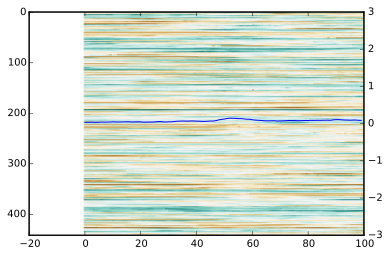

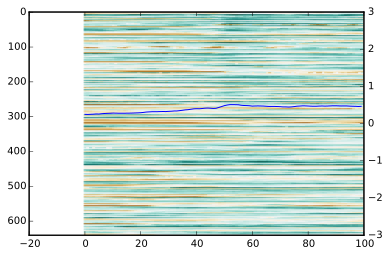

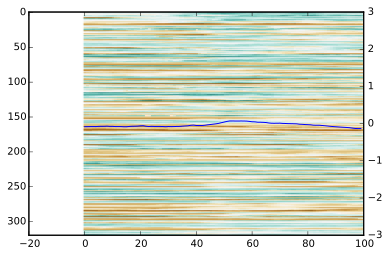

In [302]:
#dtmtrx = np.array(sorted_saccades_22H05['lw_natural'])[yl_trial_mask & stim_mask]
dtmtrx = np.array(sorted_saccades_22H05['i2'])[yl_trial_mask & stim_mask]
#dtmtrx -= np.nanmean(dtmtrx[:,:30],axis = 1)[:,None]
plb.imshow(dtmtrx,vmin = -3,vmax = 3)
plb.twinx()
plb.plot(np.mean(dtmtrx,axis = 0))
plb.gca().set_ybound(-3,3)
plb.figure()

#dtmtrx = np.array(sorted_saccades_22H05['lw_natural'])[yr_trial_mask & stim_mask]
dtmtrx = np.array(sorted_saccades_22H05['i2'])[yr_trial_mask & stim_mask]
#dtmtrx -= np.mean(dtmtrx[:,:30],axis = 1)[:,None]
plb.imshow(dtmtrx,vmin = -3,vmax = 3)
plb.twinx()
plb.plot(np.mean(dtmtrx,axis = 0))
plb.gca().set_ybound(-3,3)
plb.figure()

#dtmtrx = np.array(sorted_saccades_22H05['lw_natural'])[yr_trial_mask & bsln_mask]
dtmtrx = np.array(sorted_saccades_22H05['i2'])[tu_trial_mask & stim_mask]
#dtmtrx -= np.mean(dtmtrx[:,:30],axis = 1)[:,None]
plb.imshow(dtmtrx,vmin = -3,vmax = 3)
plb.twinx()
plb.plot(np.mean(dtmtrx,axis = 0))
plb.gca().set_ybound(-3,3)

In [68]:
total_time = xi[-1]-xi[0]
bin_time = total_time/100